# Laboratorio MLOPS

### Ciclo de Vida del Flujo de Trabajo de ML

#### Estudiante: Bastian Rojas Pereira

##### 1- Lo principal es importar las bibliotecas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

#### "Pandas" se utiliza para la manipulación de datos, "Sklearn" para el modelado y evaluación de modelos, "Matplotlib" y "Seaborn" para la visualización de datos

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Auto.csv')

#### Cargamos el conjunto de datos que se encuentra en Github con pd.read_csv() de pandas.

#### Este conjunto de datos contiene información sobre varios modelos de automóviles, incluidos detalles como el fabricante, el modelo, el año de fabricación, el número de cilindros, la cilindrada, la potencia neta, el peso en libras, la aceleración, el país de origen y el consumo de combustible en millas por galón (mpg).

In [3]:
data['acceleration'] = data['acceleration'].astype(float)

#### Ahora convertimos la columna 'acceleration' a tipo float]

In [4]:
data = data.drop('name', axis=1)

#### Y eliminamos la columna 'name' que no es numérica (Dificultando su uso con Sklearn)

In [5]:
print(data.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0    70   
1  15.0          8         350.0         165    3693          11.5    70   
2  18.0          8         318.0         150    3436          11.0    70   
3  16.0          8         304.0         150    3433          12.0    70   
4  17.0          8         302.0         140    3449          10.5    70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1  


#### Y imprimimos las tablas y columnas del conjunto de datos (csv)

In [6]:
X = data.drop('mpg', axis=1)
y = data['mpg']

#### Despues hacemos la selección de características y variable objetivo, eliminando la columna 'mpg' de X y se asignó a y

## Modelo Regresion Lineal

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Dividimos los conjuntos para el entrenamiento y prueba, 80% de los datos se utilizan para entrenamiento y el 20% restante se utiliza para prueba.

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Se normalización los datos para asegurarse de que todas las características tengan la misma escala

In [9]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

#### Entrenamos el modelo de regresión lineal

In [10]:
y_pred_linear = linear_model.predict(X_test_scaled)

#### Se realiza las predicciones en el conjunto de prueba con regresión lineal

In [11]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Linear Regression MSE: {mse_linear}')

Linear Regression MSE: 10.710864418838398


#### Se calcular el error cuadrático medio (MSE) para evaluar el rendimiento del modelo de regresión lineal

In [12]:
variance = y.var()
data_range = y.max() - y.min()

print(f'Varianza de la variable objetivo: {variance}')
print(f'Rango de la variable objetivo: {data_range}')

Varianza de la variable objetivo: 60.918141865441825
Rango de la variable objetivo: 37.6


#### Se calcula la varianza y el rango de la variable objetivo

In [13]:
print(f'Relación Linear Regression MSE/Varianza: {mse_linear/variance}')
print(f'Relación Linear Regression MSE/Rango: {mse_linear/data_range}')

Relación Linear Regression MSE/Varianza: 0.17582388580559366
Relación Linear Regression MSE/Rango: 0.2848634153946382


#### Y se compara el MSE con la varianza y el rango para regresión lineal

## Modelo XGB Regressor

In [14]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### Entrenamos el modelo XGBoost

In [15]:
y_pred_xgb = xgb_model.predict(X_test_scaled)

#### Ahora realizamos las predicciones en el conjunto de prueba con XGBoost

In [16]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'XGBoost Regression MSE: {mse_xgb}')

XGBoost Regression MSE: 6.3988455692432105


#### Y calculamos el error cuadrático medio (MSE) para XGBoost

In [17]:
print(f'Relación XGBoost Regression MSE/Varianza: {mse_xgb/variance}')
print(f'Relación XGBoost Regression MSE/Rango: {mse_xgb/data_range}')

Relación XGBoost Regression MSE/Varianza: 0.10504006480330949
Relación XGBoost Regression MSE/Rango: 0.1701820630117875


#### Comparamos el MSE con la varianza y el rango para XGBoost

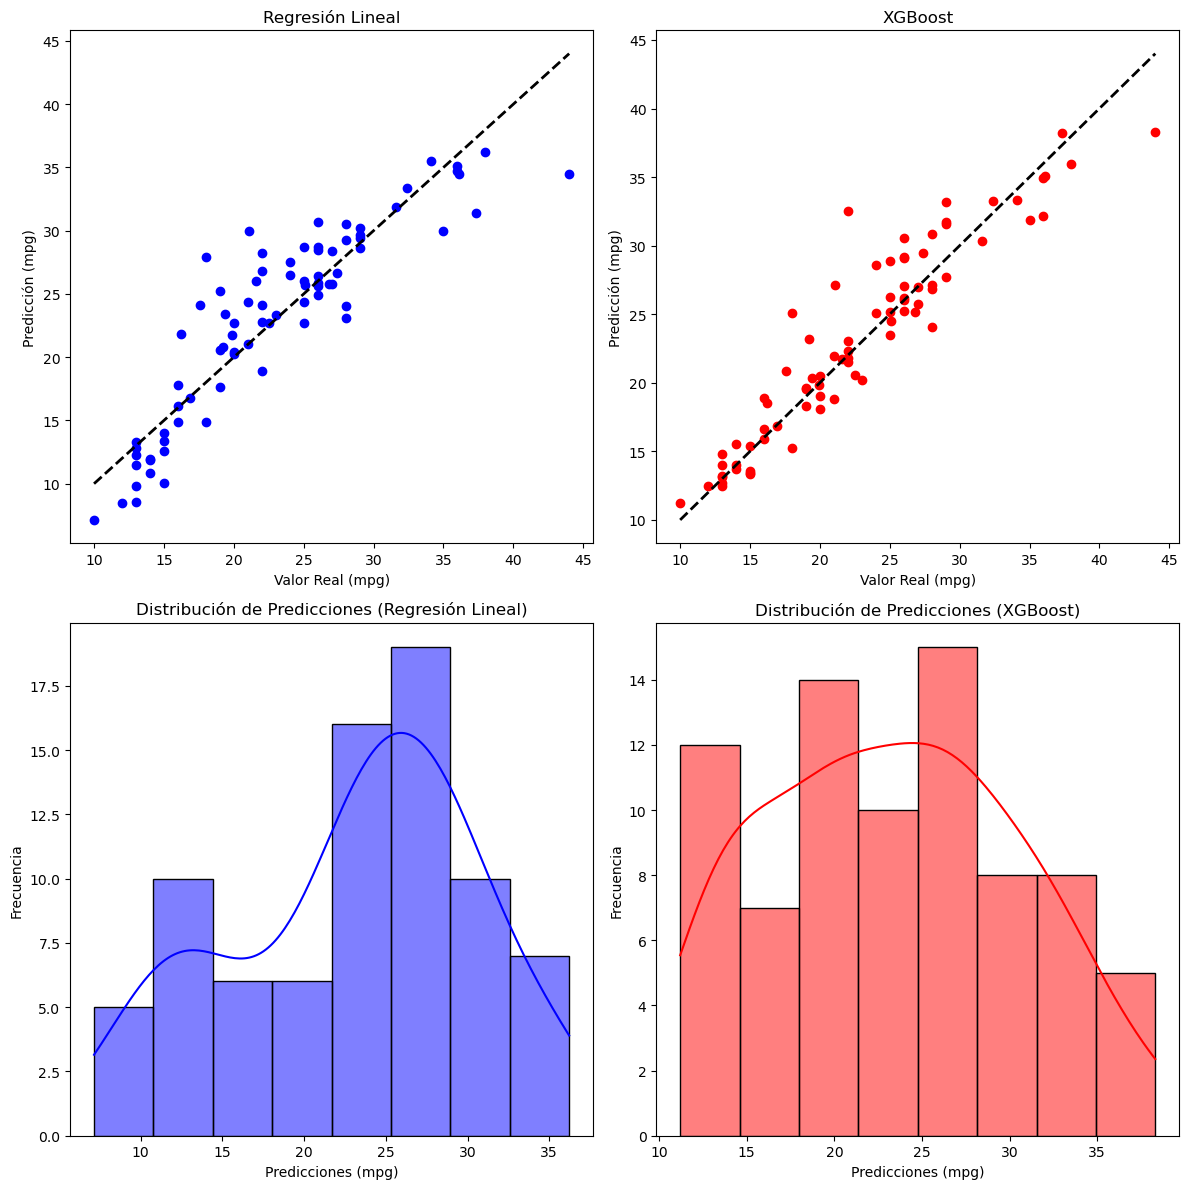

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0, 0].scatter(y_test, y_pred_linear, color='blue')
axs[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[0, 0].set_xlabel('Valor Real (mpg)')
axs[0, 0].set_ylabel('Predicción (mpg)')
axs[0, 0].set_title('Regresión Lineal')

axs[0, 1].scatter(y_test, y_pred_xgb, color='red')
axs[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[0, 1].set_xlabel('Valor Real (mpg)')
axs[0, 1].set_ylabel('Predicción (mpg)')
axs[0, 1].set_title('XGBoost')

sns.histplot(y_pred_linear, ax=axs[1, 0], color='blue', kde=True)
axs[1, 0].set_xlabel('Predicciones (mpg)')
axs[1, 0].set_ylabel('Frecuencia')
axs[1, 0].set_title('Distribución de Predicciones (Regresión Lineal)')

sns.histplot(y_pred_xgb, ax=axs[1, 1], color='red', kde=True)
axs[1, 1].set_xlabel('Predicciones (mpg)')
axs[1, 1].set_ylabel('Frecuencia')
axs[1, 1].set_title('Distribución de Predicciones (XGBoost)')

plt.tight_layout()
plt.show()

#### Y como último creamos una figura y ejes utilizando matplotlib para poder comparar las predicciones con los valores reales y las distribuciones de las predicciones para ambos modelos.